In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving city_hour.csv to city_hour.csv


In [ ]:
import pandas as pd

# Define the project directory in Google Drive
project_dir = '/content/drive/My Drive/Colab Notebooks/project_data/'

# Load the CSV file
file_path = project_dir + 'city_hour.csv'
data = pd.read_csv(file_path)

# Get unique cities
cities = data['City'].unique()

# Create a DataFrame and corresponding CSV for each city
for city in cities:
    city_data = data[data['City'] == city]
    output_file = project_dir + f'{city}_data.csv'  # Save files to the project_data directory
    city_data.to_csv(output_file, index=False)
    print(f'Saved {output_file}')

print("All city CSV files have been created and saved to the project_data directory.")

Saved /content/drive/My Drive/Colab Notebooks/project_data/Ahmedabad_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Aizawl_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Amaravati_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Amritsar_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Bengaluru_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Bhopal_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Brajrajnagar_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Chandigarh_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Chennai_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Coimbatore_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Delhi_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Ernakulam_data.csv
Saved /content/drive/My Drive/Colab Notebooks/project_data/Gurugram_data

In [ ]:
import pandas as pd

def count_noon_data_points_after_2017(file_name):
    # Load the city CSV file
    city_data = pd.read_csv(file_name)

    # Convert the datetime column to datetime format (assuming the datetime column is named 'Datetime')
    city_data['Datetime'] = pd.to_datetime(city_data['Datetime'])

    # Filter the data for dates after 2017 and for noon time points (12:00 PM)
    filtered_data = city_data[(city_data['Datetime'] >= pd.Timestamp('2017-01-01')) & (city_data['Datetime'].dt.hour == 12)]

    # Return the number of data points
    return len(filtered_data)

# File names for the cities
files = {
    'Hyderabad': project_dir+'Hyderabad_data.csv',
    'Bengaluru': project_dir+'Bengaluru_data.csv',
    'Delhi': project_dir+'Delhi_data.csv'
}

# Count and print the number of data points after 2017 for each city at noon
for city, file_name in files.items():
    count = count_noon_data_points_after_2017(file_name)
    print(f'{city}: {count} data points after 2017 at noon')


Hyderabad: 1277 data points after 2017 at noon
Bengaluru: 1277 data points after 2017 at noon
Delhi: 1277 data points after 2017 at noon


In [ ]:
def count_missing_values(file_name, feature):
    # Load the city CSV file
    city_data = pd.read_csv(file_name)

    # Convert the datetime column to datetime format
    city_data['Datetime'] = pd.to_datetime(city_data['Datetime'])

    # Filter the data for dates after 2017
    filtered_data = city_data[(city_data['Datetime'] >= pd.Timestamp('2017-01-01')) & (city_data['Datetime'].dt.hour == 12)]

    # Count the number of missing values for the specified feature
    missing_count = filtered_data[feature].isnull().sum()

    return missing_count


# Features of interest
features = ['PM2.5', 'PM10', 'NOx', 'CO']

# Count and print the number of missing values for each feature in each city
for city, file_name in files.items():
    print(f'{city}:')
    for feature in features:
        missing_count = count_missing_values(file_name, feature)
        print(f'  {feature}: {missing_count} missing values')
    print()

Hyderabad:
  PM2.5: 10 missing values
  PM10: 12 missing values
  NOx: 2 missing values
  CO: 2 missing values

Bengaluru:
  PM2.5: 43 missing values
  PM10: 96 missing values
  NOx: 58 missing values
  CO: 13 missing values

Delhi:
  PM2.5: 11 missing values
  PM10: 67 missing values
  NOx: 0 missing values
  CO: 0 missing values



In [ ]:
def load_and_filter_data(file_name):
    # Load the city CSV file
    city_data = pd.read_csv(file_name)

    # Convert the datetime column to datetime format (assuming the datetime column is named 'Datetime')
    city_data['Datetime'] = pd.to_datetime(city_data['Datetime'])

    # Filter out the 'Datetime' and 'City' columns, keep only pollutant columns
    pollutant_columns = ['PM2.5', 'PM10', 'NOx', 'CO']  # Adjust this list if necessary
    filtered_data = city_data[pollutant_columns]

    return filtered_data

# Function to calculate the longest sequence of consecutive missing values
def longest_consecutive_missing(series):
    max_count = 0
    current_count = 0
    for value in series:
        if pd.isna(value):
            current_count += 1
            if current_count > max_count:
                max_count = current_count
        else:
            current_count = 0
    return max_count

# File names for the cities
files = {
    'Hyderabad': project_dir+'Hyderabad_data.csv',
    'Bengaluru': project_dir+'Bengaluru_data.csv',
    'Delhi': project_dir+'Delhi_data.csv'
}

# Calculate and print the longest consecutive missing values for each pollutant in each city
for city, file_name in files.items():
    df = load_and_filter_data(file_name)
    print(f'{city}:')
    longest_missing = {col: longest_consecutive_missing(df[col]) for col in df.columns}
    for pollutant, count in longest_missing.items():
        print(f'  {pollutant}: {count} consecutive missing values')
    print()

Hyderabad:
  PM2.5: 4 consecutive missing values
  PM10: 4 consecutive missing values
  NOx: 1 consecutive missing values
  CO: 1 consecutive missing values

Bengaluru:
  PM2.5: 19 consecutive missing values
  PM10: 24 consecutive missing values
  NOx: 4 consecutive missing values
  CO: 1 consecutive missing values

Delhi:
  PM2.5: 2 consecutive missing values
  PM10: 58 consecutive missing values
  NOx: 0 consecutive missing values
  CO: 0 consecutive missing values



In [ ]:
from tabulate import tabulate
# Create a dictionary with the missing values data
missing_values_data = {
    'City': ['Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad',
             'Bengaluru', 'Bengaluru', 'Bengaluru', 'Bengaluru',
             'Delhi', 'Delhi', 'Delhi', 'Delhi'],
    'Pollutant': ['PM2.5', 'PM10', 'NOx', 'CO',
                  'PM2.5', 'PM10', 'NOx', 'CO',
                  'PM2.5', 'PM10', 'NOx', 'CO'],
    'Missing Values': [260, 285, 40, 37,
                       980, 1804, 1252, 248,
                       275, 1616, 0, 0]
}

# Convert the dictionary to a pandas DataFrame
missing_values_df = pd.DataFrame(missing_values_data)

# Print the missing values table using tabulate for better formatting
print(tabulate(missing_values_df, headers='keys', tablefmt='grid'))

+----+-----------+-------------+------------------+
|    | City      | Pollutant   |   Missing Values |
+====+===========+=============+==================+
|  0 | Hyderabad | PM2.5       |              260 |
+----+-----------+-------------+------------------+
|  1 | Hyderabad | PM10        |              285 |
+----+-----------+-------------+------------------+
|  2 | Hyderabad | NOx         |               40 |
+----+-----------+-------------+------------------+
|  3 | Hyderabad | CO          |               37 |
+----+-----------+-------------+------------------+
|  4 | Bengaluru | PM2.5       |              980 |
+----+-----------+-------------+------------------+
|  5 | Bengaluru | PM10        |             1804 |
+----+-----------+-------------+------------------+
|  6 | Bengaluru | NOx         |             1252 |
+----+-----------+-------------+------------------+
|  7 | Bengaluru | CO          |              248 |
+----+-----------+-------------+------------------+
|  8 | Delhi

In [ ]:
# Function to load the city data, filter by date, and save the modified data
def remove_data_before_2017(file_name):
    # Load the city CSV file
    city_data = pd.read_csv(file_name)

    # Convert the datetime column to datetime format
    city_data['Datetime'] = pd.to_datetime(city_data['Datetime'])

    # Filter the data for dates on or after 2017
    filtered_data = city_data[(city_data['Datetime'] >= pd.Timestamp('2017-01-01')) & (city_data['Datetime'].dt.hour == 12)]

    # Save the filtered data back to the CSV file
    filtered_data.to_csv(file_name, index=False)
    print(f'{file_name} has been updated with data from 2017 onwards.')


# File names for the cities (adjust the paths if necessary)
files = {
    'Hyderabad': project_dir + 'Hyderabad_data.csv',
    'Bengaluru': project_dir + 'Bengaluru_data.csv',
    'Delhi': project_dir + 'Delhi_data.csv'
}

# Remove data before 2017 for each city and save the modified files
for file_name in files.values():
    remove_data_before_2017(file_name)

/content/drive/My Drive/Colab Notebooks/project_data/Hyderabad_data.csv has been updated with data from 2017 onwards.
/content/drive/My Drive/Colab Notebooks/project_data/Bengaluru_data.csv has been updated with data from 2017 onwards.
/content/drive/My Drive/Colab Notebooks/project_data/Delhi_data.csv has been updated with data from 2017 onwards.


In [ ]:
# Load and filter the data
def load_and_filter_data(file_name):
    data = pd.read_csv(file_name)
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    # Keep only the necessary columns
    filtered_data = data[['Datetime', 'PM2.5', 'PM10', 'NOx', 'CO']]
    return filtered_data

# Process each city's data
for city, file_name in files.items():
    filtered_df = load_and_filter_data(file_name)

    # Save the filtered data to a new CSV file in the project directory
    output_file = project_dir + f'{city}_filtered_final.csv'
    filtered_df.to_csv(output_file, index=False)

    print(f'{city}: Filtered data saved to {output_file}')

Hyderabad: Filtered data saved to /content/drive/My Drive/Colab Notebooks/project_data/Hyderabad_filtered_final.csv
Bengaluru: Filtered data saved to /content/drive/My Drive/Colab Notebooks/project_data/Bengaluru_filtered_final.csv
Delhi: Filtered data saved to /content/drive/My Drive/Colab Notebooks/project_data/Delhi_filtered_final.csv


In [ ]:
# File names for the cities (adjust the paths if necessary)
filtered_files = {
    'Hyderabad': project_dir + 'Hyderabad_filtered_final.csv',
    'Bengaluru': project_dir + 'Bengaluru_filtered_final.csv',
    'Delhi': project_dir + 'Delhi_filtered_final.csv'
}

# Load the CSV file
def list_columns(file_name):
    df = pd.read_csv(file_name)
    columns = df.columns.tolist()
    return columns


# Calculate and print the longest consecutive missing values for each pollutant in each city
for city, file_name in filtered_files.items():
    df = load_and_filter_data(file_name)
    print(f'{city}:')
    longest_missing = {col: longest_consecutive_missing(df[col]) for col in df.columns if col != 'city'}
    for pollutant, count in longest_missing.items():
        print(f'  {pollutant}: {count} consecutive missing values')
    print()

Hyderabad:
  PM2.5: 4 consecutive missing values
  PM10: 4 consecutive missing values
  NOx: 1 consecutive missing values
  CO: 1 consecutive missing values

Bengaluru:
  PM2.5: 19 consecutive missing values
  PM10: 24 consecutive missing values
  NOx: 4 consecutive missing values
  CO: 1 consecutive missing values

Delhi:
  PM2.5: 2 consecutive missing values
  PM10: 58 consecutive missing values
  NOx: 0 consecutive missing values
  CO: 0 consecutive missing values



In [ ]:
# Load the data
data = pd.read_csv(project_dir + 'Bengaluru_filtered_final.csv')

# Print before modification
print("Before modification:")
print(data['CO'].describe())

# Modify values in 'CO' column that are over 4.5 to be 0
data.loc[data['CO'] > 4.5, 'CO'] = 0

# Print after modification
print("\nAfter modification:")
print(data['CO'].describe())

# Save the modified data back to the CSV file
data.to_csv(project_dir + 'Bengaluru_filtered_final.csv', index=False)
print(f"Updated 'CO' values and saved to {file_path}")

Before modification:
count    1264.00000
mean        0.96057
std         1.57269
min         0.00000
25%         0.67000
50%         0.83000
75%         0.98000
max        39.15000
Name: CO, dtype: float64

After modification:
count    1264.000000
mean        0.803236
std         0.337007
min         0.000000
25%         0.660000
50%         0.820000
75%         0.970000
max         2.830000
Name: CO, dtype: float64
Updated 'CO' values and saved to /content/drive/My Drive/Colab Notebooks/project_data/city_hour.csv


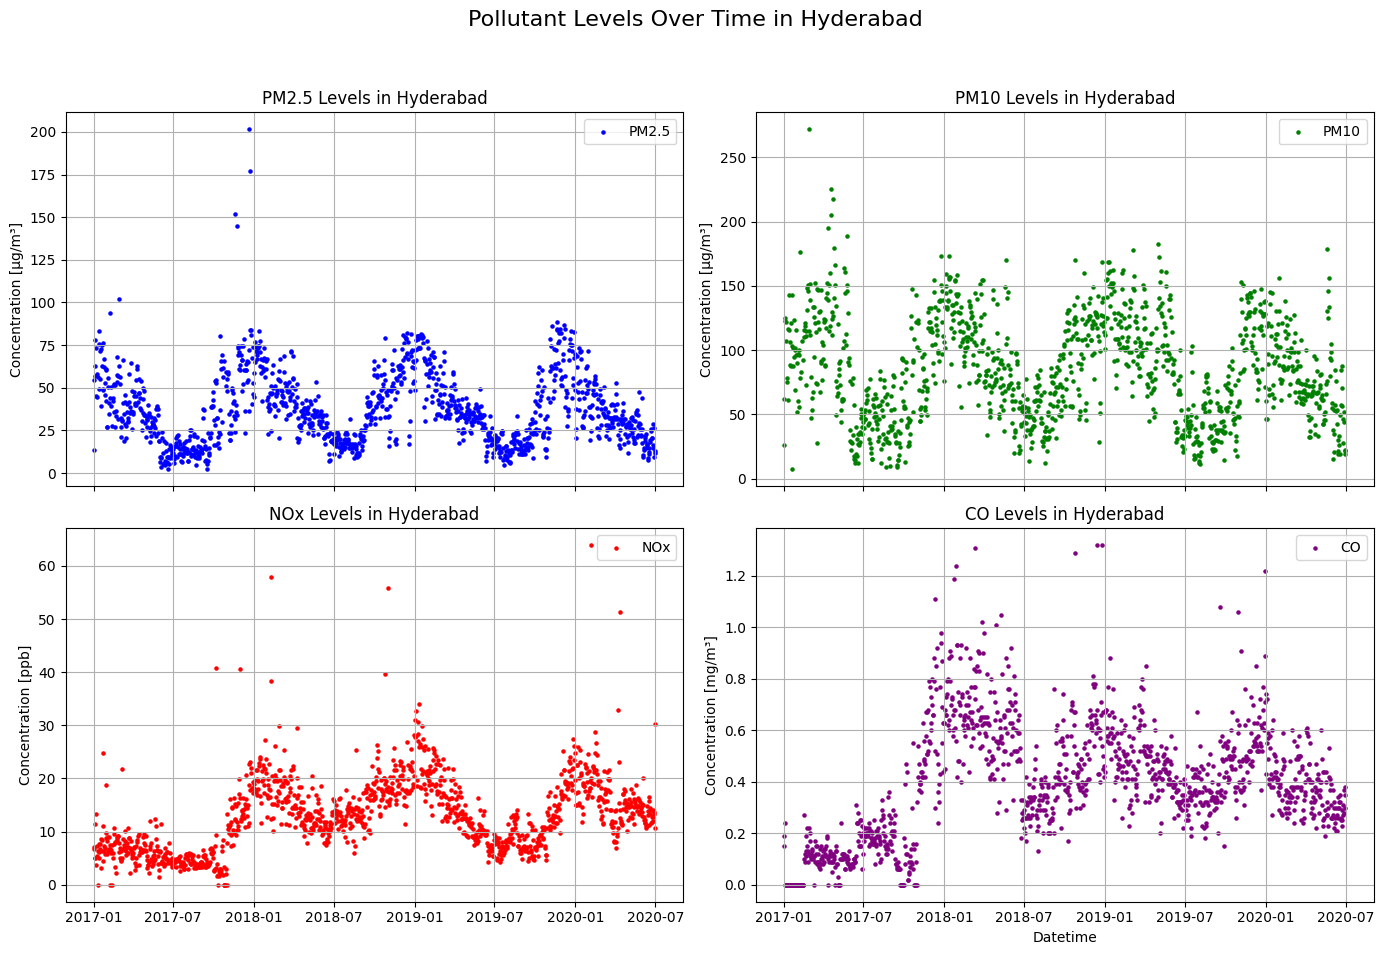

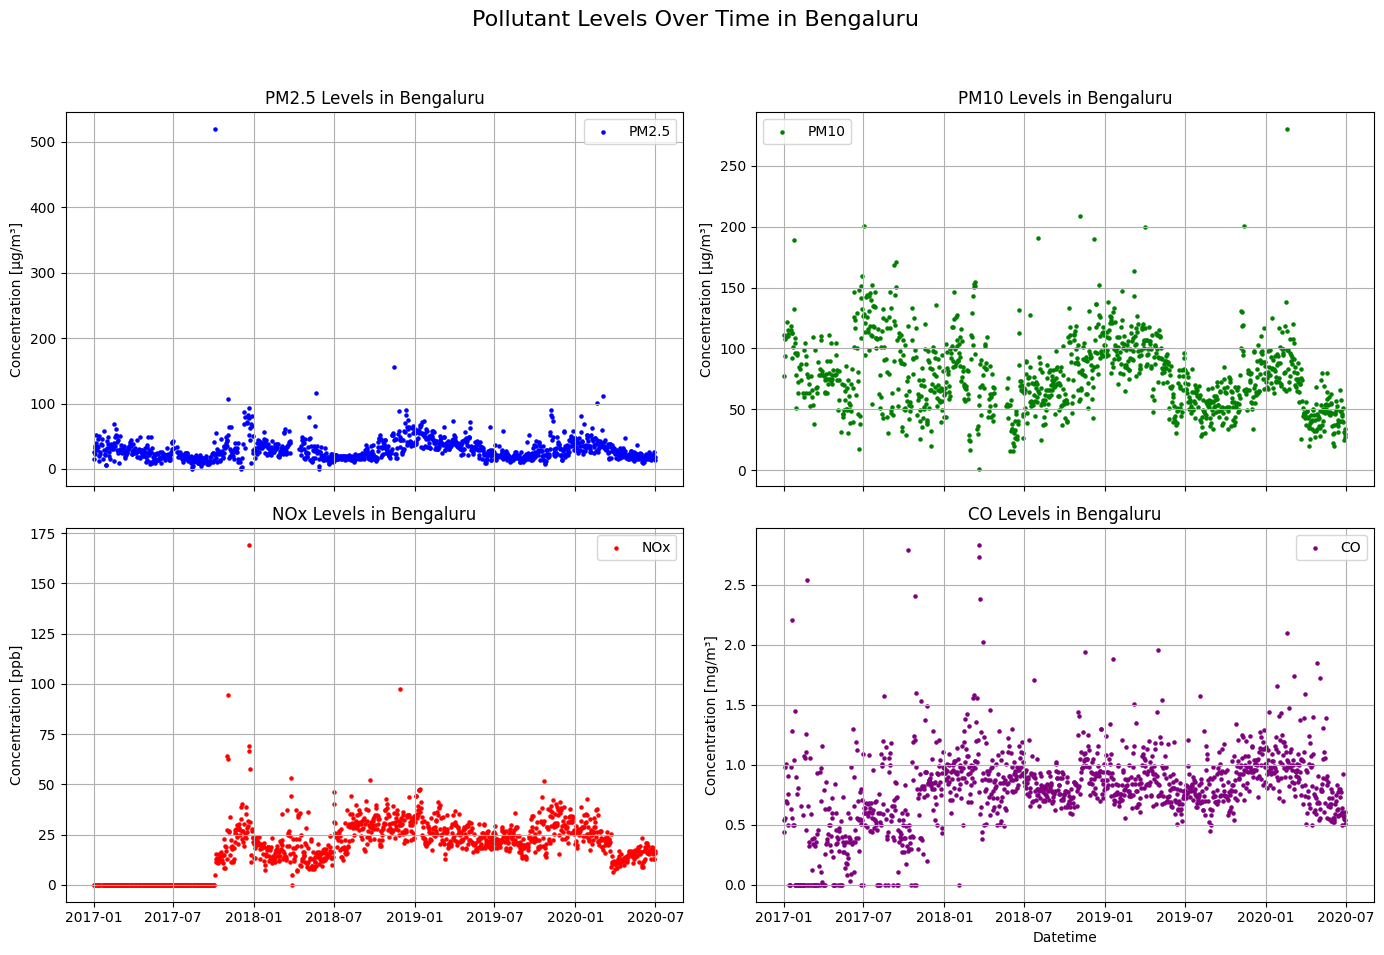

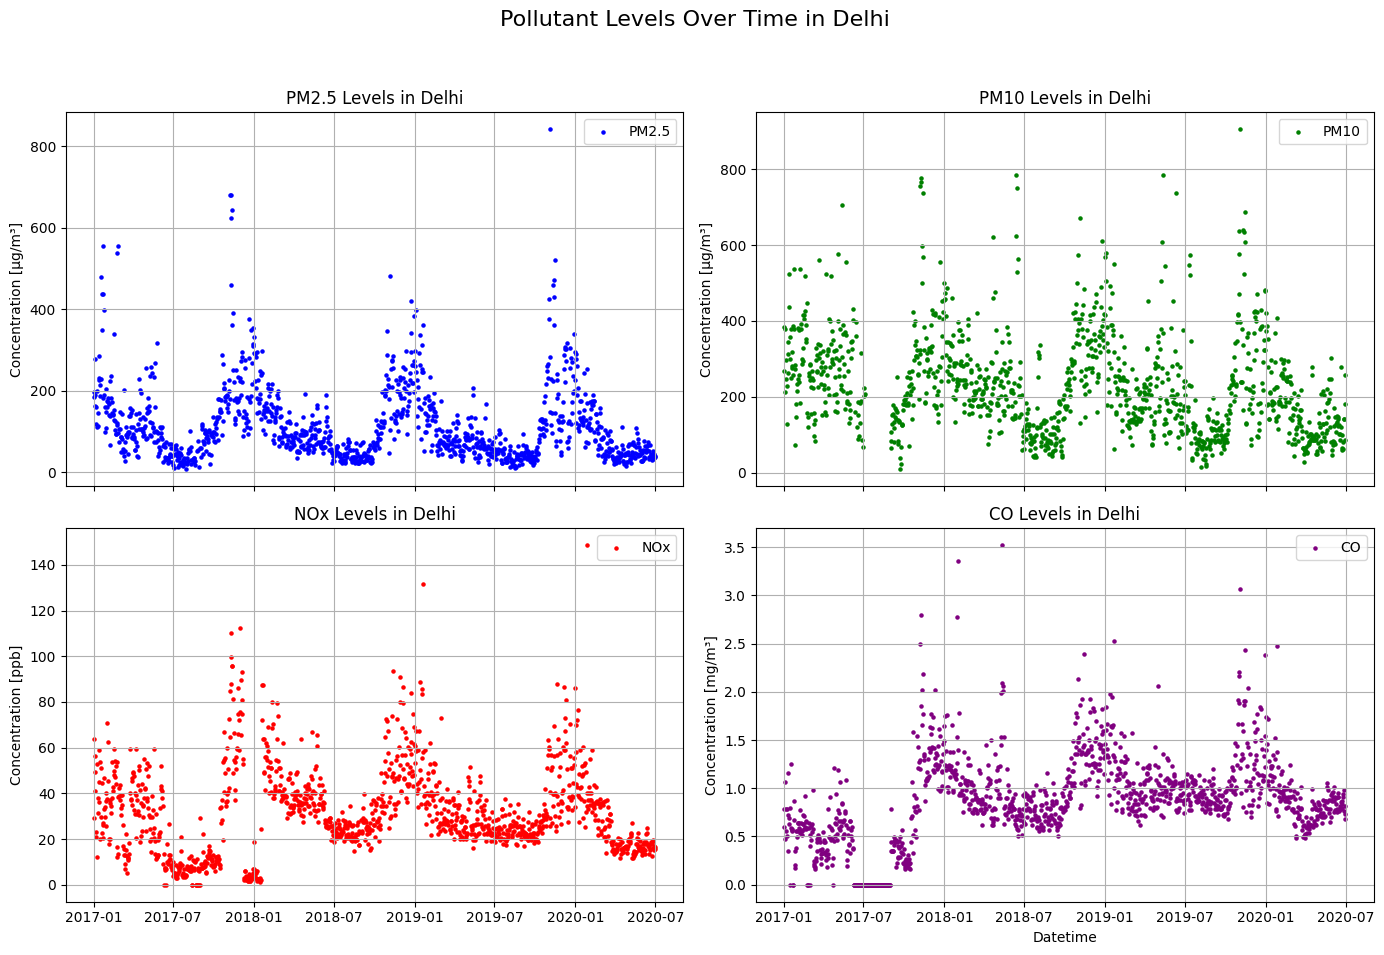

In [ ]:
import matplotlib.pyplot as plt

# Function to load and filter data, ensuring the 'Datetime' column is correctly handled
def load_and_filter_data(file_name):
    data = pd.read_csv(file_name)
    if 'Datetime' in data.columns:
        data['Datetime'] = pd.to_datetime(data['Datetime'])
    else:
        print(f"Error: 'Datetime' column not found in {file_name}")
    return data

def plot_pollutants(df, city):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
    pollutants = ['PM2.5', 'PM10', 'NOx', 'CO']
    colors = ['blue', 'green', 'red', 'purple']
    units = ['µg/m³', 'µg/m³', 'ppb', 'mg/m³']

    for i, (pollutant, color, unit) in enumerate(zip(pollutants, colors, units)):
        ax = axs[i//2, i%2]
        if 'Datetime' in df.columns and pollutant in df.columns:
            ax.scatter(df['Datetime'], df[pollutant], label=pollutant, color=color, s=5)
            ax.set_ylabel(f'Concentration [{unit}]')
            ax.set_title(f'{pollutant} Levels in {city}')
            ax.legend()
            ax.grid(True)
        else:
            print(f"Error: 'Datetime' or '{pollutant}' column not found in the DataFrame for {city}")

    fig.suptitle(f'Pollutant Levels Over Time in {city}', fontsize=16)
    plt.xlabel('Datetime')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(project_dir+f'pollutants_plot_{city}.png')
    plt.show()

# Process each city's data and plot
for city, file_name in filtered_files.items():
    df = load_and_filter_data(file_name)
    plot_pollutants(df, city)


In [ ]:
print(filtered_files)

{'Hyderabad': '/content/drive/My Drive/Colab Notebooks/project_data/Hyderabad_filtered_final.csv', 'Bengaluru': '/content/drive/My Drive/Colab Notebooks/project_data/Bengaluru_filtered_final.csv', 'Delhi': '/content/drive/My Drive/Colab Notebooks/project_data/Delhi_filtered_final.csv'}


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Process each city's data
for city, file_name in filtered_files.items():
    # Load and filter the data
    data = pd.read_csv(file_name)
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    filtered_data = data[['Datetime', 'PM2.5', 'PM10', 'NOx', 'CO']]

    # Perform imputation
    numeric_df = filtered_data.drop(columns=['Datetime'])  # Drop the 'Datetime' column for imputation
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
    imputed_array = imputer.fit_transform(numeric_df)
    imputed_df = pd.DataFrame(imputed_array, columns=numeric_df.columns, index=numeric_df.index)
    imputed_df['Datetime'] = filtered_data['Datetime']  # Add the 'Datetime' column back

    # Save the imputed data to a new CSV file in the project directory
    output_file = project_dir + f'{city}_imputed.csv'
    imputed_df.to_csv(output_file, index=False)

    print(f'{city}: Imputation completed and saved to {output_file}')

Hyderabad: Imputation completed and saved to /content/drive/My Drive/Colab Notebooks/project_data/Hyderabad_imputed.csv
Bengaluru: Imputation completed and saved to /content/drive/My Drive/Colab Notebooks/project_data/Bengaluru_imputed.csv
Delhi: Imputation completed and saved to /content/drive/My Drive/Colab Notebooks/project_data/Delhi_imputed.csv


In [ ]:
# File names for the cities
imputed_files = {
    'Hyderabad': project_dir+'Hyderabad_imputed.csv',
    'Bengaluru': project_dir+'Bengaluru_imputed.csv',
    'Delhi': project_dir+'Delhi_imputed.csv'
}

from sklearn.preprocessing import MinMaxScaler

# Dictionary to store the scaler for each city
scalers = {}

# Process each city's data
for city, file_name in imputed_files.items():
    # Load the imputed data
    data = pd.read_csv(file_name)
    data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Apply MinMaxScaler
    numeric_df = data.drop(columns=['Datetime'])  # Exclude 'Datetime' column for scaling
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns, index=numeric_df.index)
    scaled_df['Datetime'] = data['Datetime']  # Add the 'Datetime' column back

    # Save the normalized data to a new CSV file
    output_file = project_dir + f'{city}_scaled_final.csv'
    scaled_df.to_csv(output_file, index=False)
    print(f'{city}: Normalization completed and saved to {city}_scaled_final.csv')

    # Save the scaler object for later use
    scalers[city] = scaler

Hyderabad: Normalization completed and saved to Hyderabad_scaled_final.csv
Bengaluru: Normalization completed and saved to Bengaluru_scaled_final.csv
Delhi: Normalization completed and saved to Delhi_scaled_final.csv


In [ ]:
# Function to compute min and max values for each column
def compute_min_max(file_name):
    data = pd.read_csv(file_name)
    min_values = data.drop(columns=['Datetime']).min()
    max_values = data.drop(columns=['Datetime']).max()
    return min_values, max_values

# Process each city's scaled final file and compute min and max values
for city, file_name in imputed_files.items():
    scaled_file = project_dir + f'{city}_scaled_final.csv'
    min_values, max_values = compute_min_max(scaled_file)

    print(f'\n{city}: Min and Max values in each column (excluding Datetime)')
    for col in min_values.index:
        print(f'{col}: Min = {min_values[col]}, Max = {max_values[col]}')



Hyderabad: Min and Max values in each column (excluding Datetime)
PM2.5: Min = 0.0, Max = 1.0
PM10: Min = 0.0, Max = 1.0
NOx: Min = 0.0, Max = 1.0
CO: Min = 0.0, Max = 1.0

Bengaluru: Min and Max values in each column (excluding Datetime)
PM2.5: Min = 0.0, Max = 1.0
PM10: Min = 0.0, Max = 1.0
NOx: Min = 0.0, Max = 1.0
CO: Min = 0.0, Max = 1.0

Delhi: Min and Max values in each column (excluding Datetime)
PM2.5: Min = 0.0, Max = 1.0
PM10: Min = 0.0, Max = 1.0
NOx: Min = 0.0, Max = 1.0
CO: Min = 0.0, Max = 1.0


In [ ]:
# Load the normalized data for Delhi
df_delhi_normalized = pd.read_csv(project_dir+'Delhi_scaled_final.csv')

# Display the first two data points
print(df_delhi_normalized.head(2))

      PM2.5      PM10       NOx        CO             Datetime
0  0.250896  0.417874  0.196945  0.221591  2017-01-01 12:00:00
1  0.236256  0.288208  0.429417  0.170455  2017-01-02 12:00:00


In [ ]:
!pip install deap
!pip install bitstring

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 14.6 MB/s eta 0:00:00


In [ ]:


import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split

from keras.layers import LSTM, Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray

np.random.seed(42)

# Define the project directory in Google Drive
project_dir = '/content/drive/My Drive/Colab Notebooks/project_data/'

# File names for the scaled data
filtered_files = {
    'Delhi': project_dir + 'Delhi_scaled_final.csv',
    'Bengaluru': project_dir + 'Bengaluru_scaled_final.csv',
    'Hyderabad': project_dir + 'Hyderabad_scaled_final.csv'
}


# Load data for a city
def load_data(file_name):
    data = pd.read_csv(file_name)
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    return data

# Function to prepare the dataset
def prepare_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size, :])  # Include all features
        Y.append(data[i + window_size, :])    # Predict all features
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

# Train and evaluate function
def train_evaluate(ga_individual_solution):
    window_size_bits = BitArray(ga_individual_solution[0:6])
    num_units_bits = BitArray(ga_individual_solution[6:])
    window_size = window_size_bits.uint + 1  # +1 to ensure window_size is at least 1
    num_of_units = num_units_bits.uint
    print('\nWindow Size: ', window_size, ', Num of Units: ', num_of_units)

    if window_size == 0 or num_of_units == 0:
        return 100,

    X_data, Y_data = prepare_dataset(train_data, window_size)

    X_train, X_val, y_train, y_val = split(X_data, Y_data, test_size=0.15, random_state=42)
    print(f'Shape: {X_train.shape}')

    input_ph = Input(shape=(window_size, X_train.shape[2]))
    x = LSTM(num_of_units, input_shape=(window_size, X_train.shape[2]))(input_ph)
    x = Dropout(0.2)(x)
    predictions = Dense(y_train.shape[1], activation='linear')(x)
    model = Model(inputs=input_ph, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')


    # Capture the training history
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True, validation_data=(X_val, y_val))

    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print('Validation RMSE: ', rmse, '\n')

    # Plot the training and validation loss
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return rmse,

**TRIAL!!!***


Processing Delhi

Window Size:  29 , Num of Units:  7
Shape: (788, 29, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0807 - val_loss: 0.0657
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0629 - val_loss: 0.0535
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0515 - val_loss: 0.0450
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0438 - val_loss: 0.0380
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0369 - val_loss: 0.0318
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0316 - val_loss: 0.0262
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0263 - val_loss: 0.0213
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0217 - val_loss: 0.0175
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0193 - val_loss: 0.0153
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185 - val_loss: 0.0144
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - val_loss: 0.0137
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

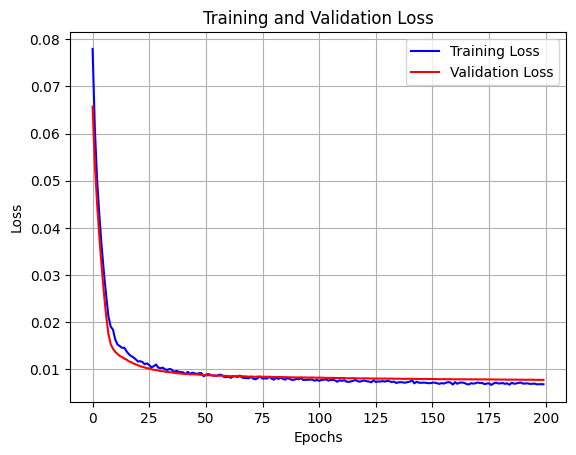


Window Size:  25 , Num of Units:  4
Shape: (792, 25, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0732 - val_loss: 0.0618
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0577 - val_loss: 0.0503
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0477 - val_loss: 0.0419
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0409 - val_loss: 0.0353
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0349 - val_loss: 0.0300
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0310 - val_loss: 0.0258
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0267 - val_loss: 0.0226
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0239 - val_loss: 0.0200
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0228 - val_loss: 0.0182
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0212 - val_loss: 0.0167
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - val_loss: 0.0156
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

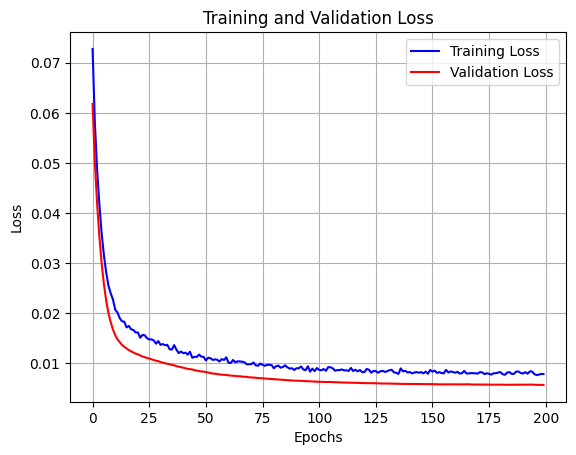


Window Size:  34 , Num of Units:  6
Shape: (784, 34, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0525 - val_loss: 0.0378
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0408 - val_loss: 0.0281
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0316 - val_loss: 0.0215
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0262 - val_loss: 0.0174
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0235 - val_loss: 0.0150
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0206 - val_loss: 0.0134
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - val_loss: 0.0124
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - val_loss: 0.0120
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0178 - val_loss: 0.0115
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0181 - val_loss: 0.0112
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0179 - val_loss: 0.0109
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

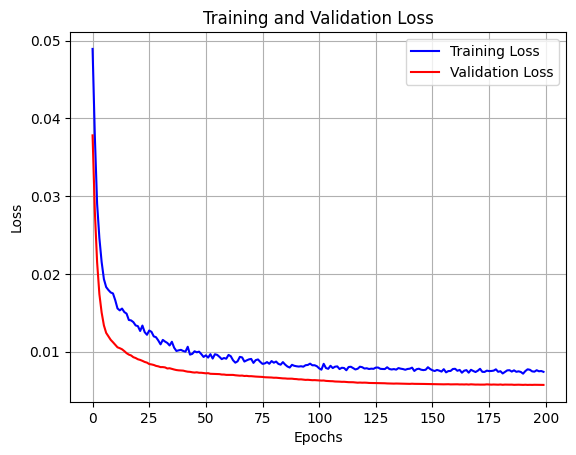


Window Size:  40 , Num of Units:  2
Shape: (779, 40, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.1068 - val_loss: 0.0714
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0862 - val_loss: 0.0594
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0724 - val_loss: 0.0509
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0633 - val_loss: 0.0445
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0555 - val_loss: 0.0396
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0504 - val_loss: 0.0356
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0452 - val_loss: 0.0322
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - val_loss: 0.0294
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0384 - val_loss: 0.0270
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0358 - val_loss: 0.0249
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0328 - val_loss: 0.0231
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0

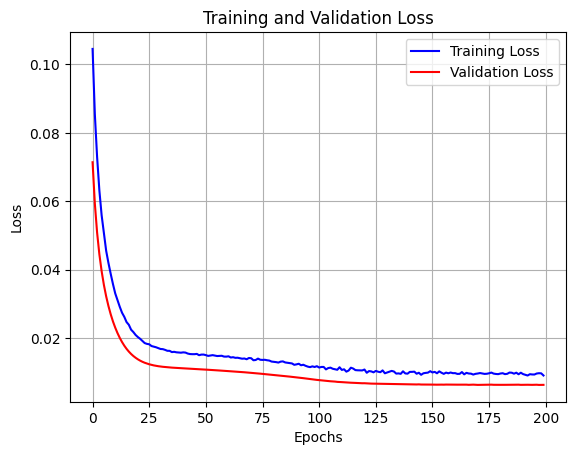


Window Size:  1 , Num of Units:  4
Shape: (812, 1, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0717 - val_loss: 0.0636
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0639 - val_loss: 0.0567
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0569 - val_loss: 0.0507
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0511 - val_loss: 0.0455
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0461 - val_loss: 0.0410
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - val_loss: 0.0372
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0376 - val_loss: 0.0338
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - val_loss: 0.0309
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0318 - val_loss: 0.0283
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - val_loss: 0.0261
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277 - val_loss: 0.0242
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0253 - val_l

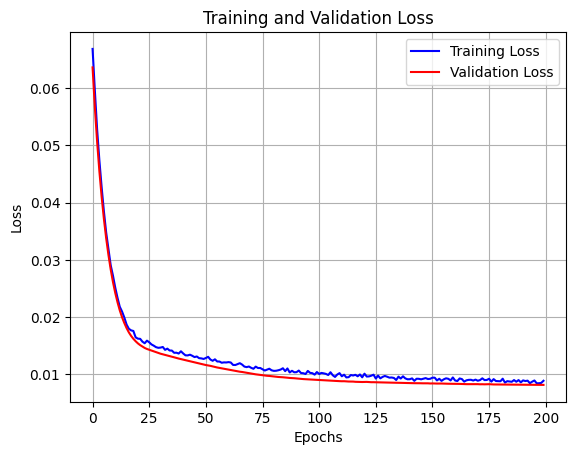


Window Size:  58 , Num of Units:  6
Shape: (764, 58, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.1261 - val_loss: 0.0986
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1002 - val_loss: 0.0779
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0799 - val_loss: 0.0629
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0645 - val_loss: 0.0518
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0525 - val_loss: 0.0431
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0450 - val_loss: 0.0361
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0400 - val_loss: 0.0304
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0327 - val_loss: 0.0258
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0279 - val_loss: 0.0223
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0257 - val_loss: 0.0194
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0227 - val_loss: 0.0172
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0

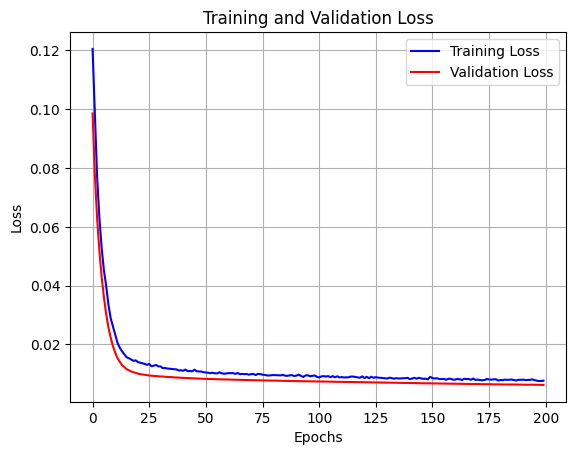


Window Size:  38 , Num of Units:  2
Shape: (781, 38, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0691 - val_loss: 0.0648
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0588 - val_loss: 0.0562
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0512 - val_loss: 0.0493
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0445 - val_loss: 0.0436
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0393 - val_loss: 0.0389
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0351 - val_loss: 0.0348
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0311 - val_loss: 0.0311
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0279 - val_loss: 0.0278
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0254 - val_loss: 0.0247
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0229 - val_loss: 0.0220
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209 - val_loss: 0.0198
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

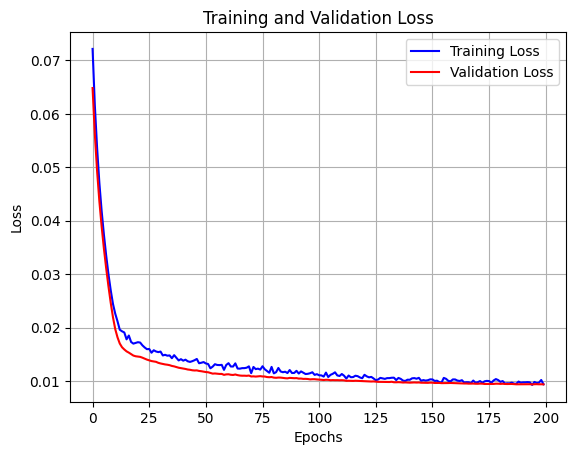


Window Size:  16 , Num of Units:  14
Shape: (799, 16, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0892 - val_loss: 0.0551
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0567 - val_loss: 0.0343
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0368 - val_loss: 0.0192
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0257 - val_loss: 0.0122
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0204 - val_loss: 0.0108
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 - val_loss: 0.0105
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0185 - val_loss: 0.0101
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0171 - val_loss: 0.0096
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - val_loss: 0.0093
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0153 - val_loss: 0.0091
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - val_loss: 0.0088
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.01

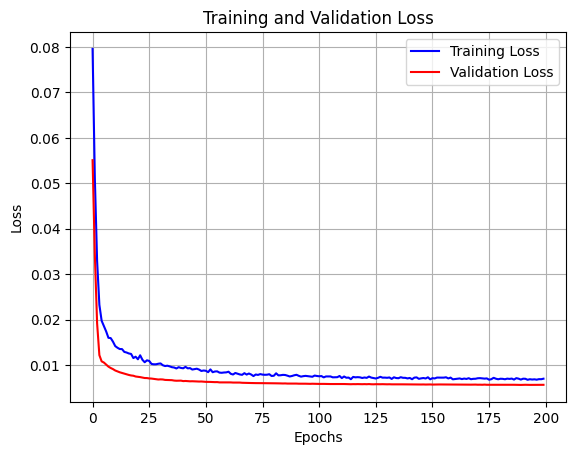


Window Size:  1 , Num of Units:  6
Shape: (812, 1, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0580 - val_loss: 0.0500
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0493 - val_loss: 0.0426
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - val_loss: 0.0364
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0364 - val_loss: 0.0314
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - val_loss: 0.0273
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272 - val_loss: 0.0240
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - val_loss: 0.0214
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - val_loss: 0.0194
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - val_loss: 0.0177
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - val_loss: 0.0164
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - val_loss: 0.0153
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - val_l

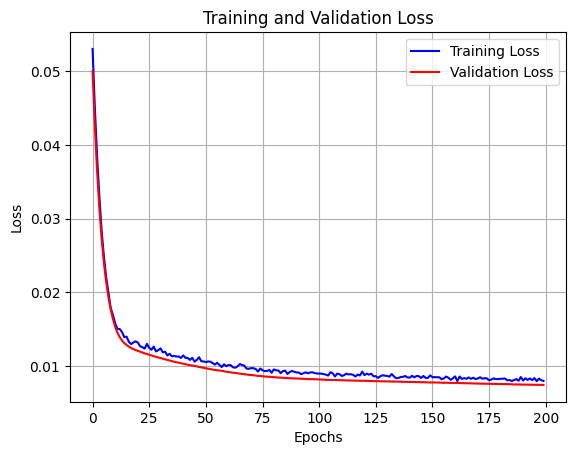


Window Size:  38 , Num of Units:  0

Window Size:  4 , Num of Units:  4
Shape: (810, 4, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0775 - val_loss: 0.0589
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0610 - val_loss: 0.0457
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - val_loss: 0.0360
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0399 - val_loss: 0.0292
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - val_loss: 0.0244
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0275 - val_loss: 0.0211
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0255 - val_loss: 0.0189
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0237 - val_loss: 0.0174
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0211 - val_loss: 0.0162
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0208 - val_loss: 0.0154
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0184 - val_loss: 0.0148
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - 

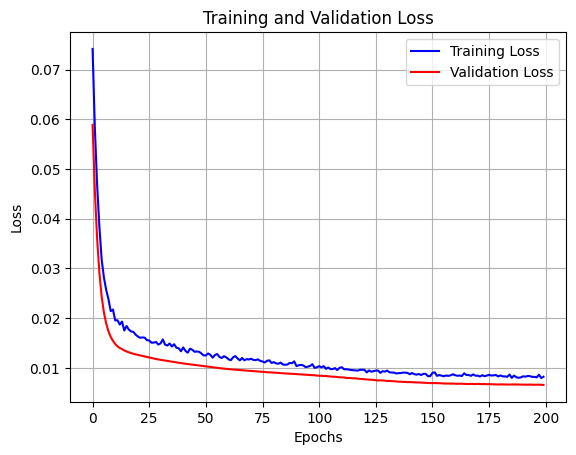


Window Size:  8 , Num of Units:  4
Shape: (806, 8, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0404 - val_loss: 0.0251
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0333 - val_loss: 0.0190
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - val_loss: 0.0153
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - val_loss: 0.0133
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - val_loss: 0.0122
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - val_loss: 0.0115
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - val_loss: 0.0110
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - val_loss: 0.0106
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - val_loss: 0.0103
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0195 - val_loss: 0.0102
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160 - val_loss: 0.0100
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0171 - val_

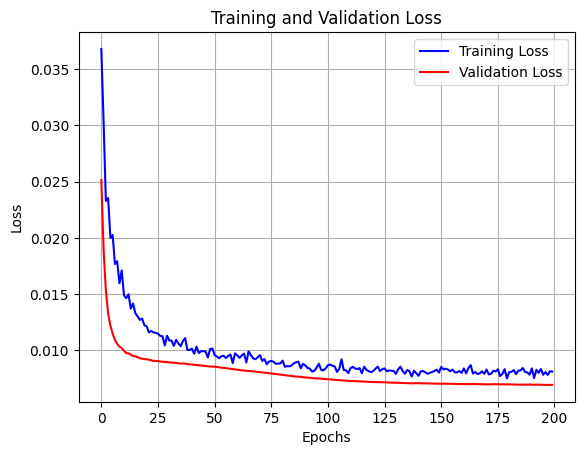


Window Size:  13 , Num of Units:  1
Shape: (802, 13, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1405 - val_loss: 0.1231
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1280 - val_loss: 0.1083
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1114 - val_loss: 0.0954
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0969 - val_loss: 0.0844
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0846 - val_loss: 0.0749
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0779 - val_loss: 0.0668
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0686 - val_loss: 0.0598
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0614 - val_loss: 0.0539
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0554 - val_loss: 0.0487
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0500 - val_loss: 0.0443
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0450 - val_loss: 0.0406
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - 

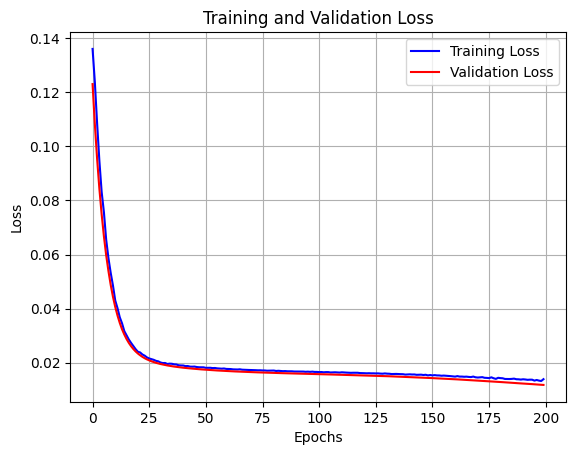


Window Size:  36 , Num of Units:  0

Window Size:  62 , Num of Units:  0

Window Size:  7 , Num of Units:  13
Shape: (807, 7, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0400 - val_loss: 0.0245
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0249 - val_loss: 0.0149
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0172 - val_loss: 0.0104
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0141 - val_loss: 0.0088
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0140 - val_loss: 0.0084
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - val_loss: 0.0082
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127 - val_loss: 0.0080
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - val_loss: 0.0079
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0127 - val_loss: 0.0077
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - val_loss: 0.0077
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0120 - val_loss: 0.0075
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

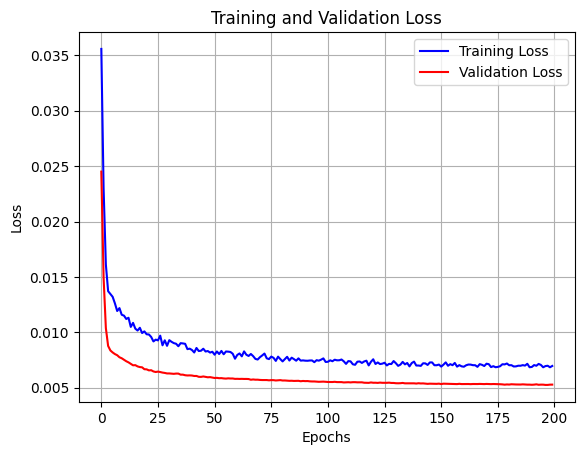


Window Size:  36 , Num of Units:  0

Window Size:  62 , Num of Units:  0

Window Size:  5 , Num of Units:  0

Window Size:  6 , Num of Units:  0


In [ ]:
# GA parameters
population_size = 4
num_generations = 4
gene_length = 10

creator.create('FitnessMax', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n=gene_length)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.6)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

# Process data for Delhi
city = 'Delhi'
file_name = filtered_files[city]
print(f'\nProcessing {city}')
data = load_data(file_name)
data_values = data[['PM2.5', 'PM10', 'NOx', 'CO']].values
train_data = data_values[0:int(len(data_values)*0.75)]
test_data = data_values[int(len(data_values)*0.75):]

population = toolbox.population(n=population_size)
r = algorithms.eaSimple(population, toolbox, cxpb=0.9, mutpb=0.6, ngen=num_generations, verbose=False)

In [ ]:
optimal_individuals_data = tools.selBest(population,k = 1) #select top 1 solution
optimal_window_size = None
optimal_num_units = None

for bi in optimal_individuals_data:
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:])
    optimal_window_size = window_size_bits.uint
    optimal_num_units = num_units_bits.uint
    print('\n Best Window Size: ', optimal_window_size, ', Best Num of Units: ', optimal_num_units)

#print(optimal_window_size, optimal_num_units)


 Best Window Size:  35 , Best Num of Units:  0


In [ ]:
optimal_window_size = 35
optimal_num_units = 9

#hence train the model with the optimal number of lstm units and optimal window size for prediction
X_train,y_train = prepare_dataset(train_data,optimal_window_size)
X_test, y_test = prepare_dataset(test_data,optimal_window_size)

inputs = Input(shape=(optimal_window_size, X_train.shape[2]))
x = LSTM(optimal_num_units, input_shape=(optimal_window_size, X_train.shape[2]))(inputs)
x = Dropout(0.2)(x)
predictions = Dense(y_train.shape[1], activation='linear')(x)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True)
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE in {city}: ', rmse)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0754
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0456
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0293
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0209
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0182
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0135
Epoch 13/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141
Epoch 14/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0137
Epoch 15/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [ ]:
# Inverse transform the predictions and actual values for each component
pollutants = ['PM2.5', 'PM10', 'NOx', 'CO']
metrics = {}
y_pred_original_dict = {}
y_test_original_dict = {}

for i, pollutant in enumerate(pollutants):
    y_pred_original = scaler.inverse_transform(y_pred)[:, i]
    y_test_original = scaler.inverse_transform(y_test)[:, i]

    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    mae = mean_absolute_error(y_test_original, y_pred_original)

    metrics[pollutant] = {'RMSE': rmse, 'MAE': mae}
    y_pred_original_dict[pollutant] = y_pred_original
    y_test_original_dict[pollutant] = y_test_original

# Print RMSE and MAE for each pollutant
for pollutant, values in metrics.items():
    print(f'{pollutant} - Test RMSE (original scale): {values["RMSE"]}')
    print(f'{pollutant} - Test MAE (original scale): {values["MAE"]}')

PM2.5 - Test RMSE (original scale): 65.61520090346521
PM2.5 - Test MAE (original scale): 39.690715162310696
PM10 - Test RMSE (original scale): 86.20298388812708
PM10 - Test MAE (original scale): 62.791802937825544
NOx - Test RMSE (original scale): 11.903001837489624
NOx - Test MAE (original scale): 7.307230541028476
CO - Test RMSE (original scale): 0.2602062052215292
CO - Test MAE (original scale): 0.17354476121434


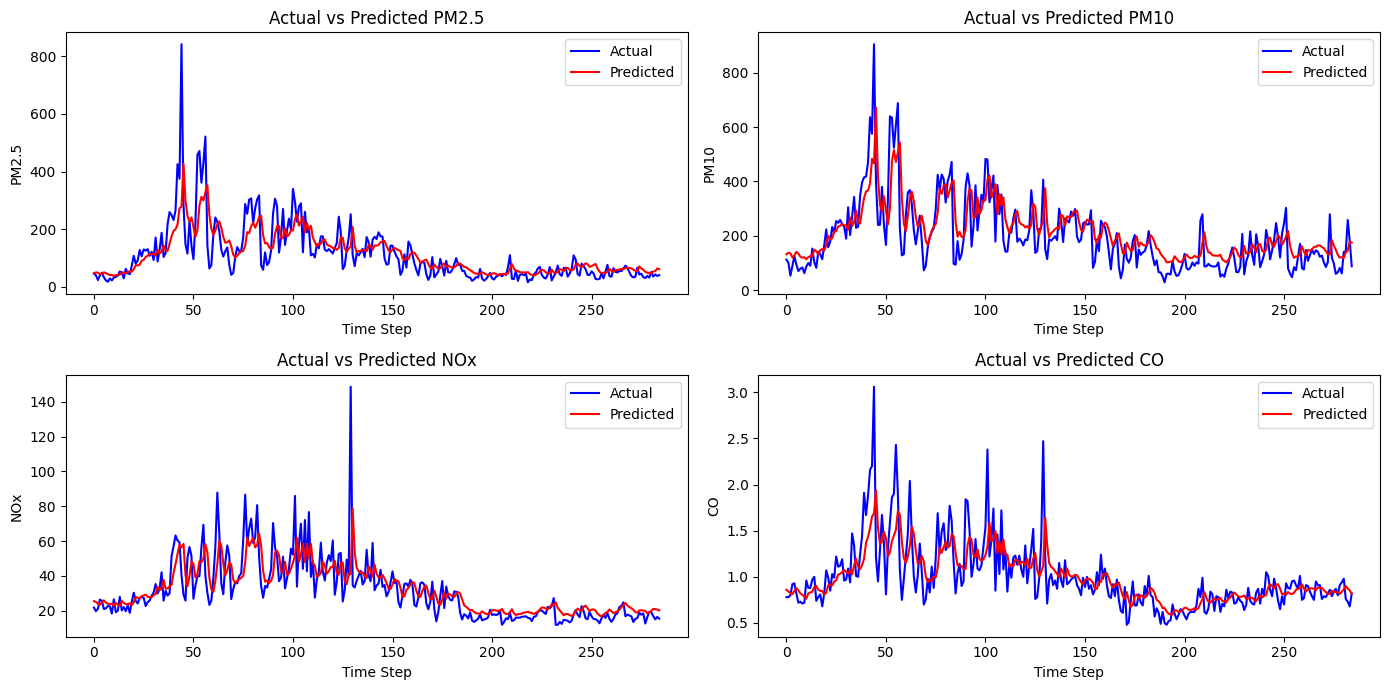

In [ ]:
# Plot the actual vs predicted values for each pollutant
plt.figure(figsize=(14, 7))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test_original_dict[pollutant], label='Actual', color='blue')
    plt.plot(y_pred_original_dict[pollutant], label='Predicted', color='red')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.xlabel('Time Step')
    plt.ylabel(pollutant)
    plt.legend()

plt.tight_layout()
plt.savefig(project_dir+'actual_predicted_pollutants_new_delhi_original.png')
plt.show()

**Bengaluru**

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



/content/drive/My Drive/Colab Notebooks/project_data/Bengaluru_scaled_final.csv

Processing Bengaluru

Window Size:  6 , Num of Units:  6
Shape: (808, 6, 4)
Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0710 - val_loss: 0.0550
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0555 - val_loss: 0.0425
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0434 - val_loss: 0.0325
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 - val_loss: 0.0242
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - val_loss: 0.0175
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - val_loss: 0.0128
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - val_loss: 0.0100
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - val_loss: 0.0086
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - val_loss: 0.0081
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - val_los

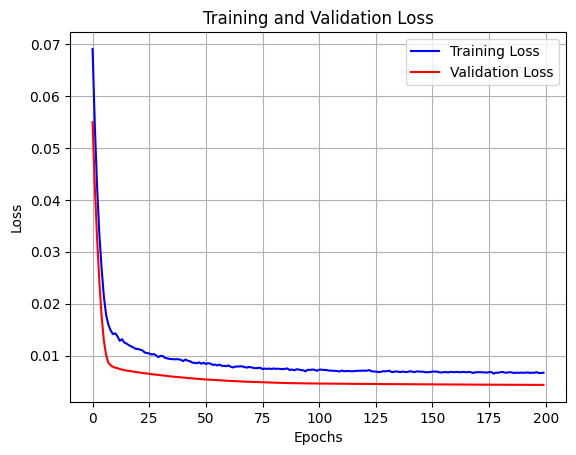


Window Size:  64 , Num of Units:  0

Window Size:  10 , Num of Units:  5
Shape: (804, 10, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0649 - val_loss: 0.0478
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - val_loss: 0.0307
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - val_loss: 0.0192
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - val_loss: 0.0139
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0125
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - val_loss: 0.0123
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - val_loss: 0.0122
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0125 -

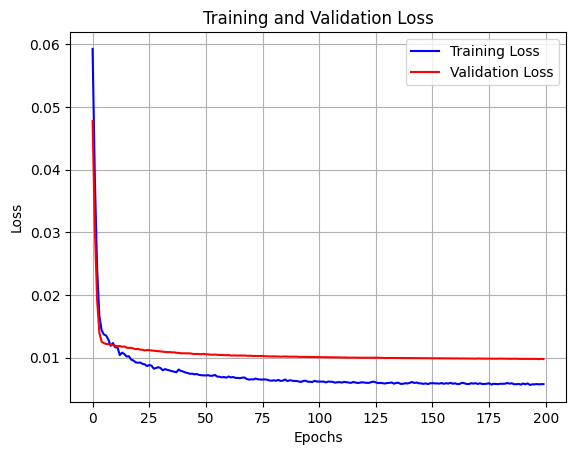


Window Size:  40 , Num of Units:  8
Shape: (779, 40, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0447 - val_loss: 0.0253
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0324 - val_loss: 0.0173
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0247 - val_loss: 0.0119
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - val_loss: 0.0091
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0170 - val_loss: 0.0083
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0153 - val_loss: 0.0079
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - val_loss: 0.0077
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - val_loss: 0.0074
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - val_loss: 0.0075
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0120 - val_loss: 0.0073
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

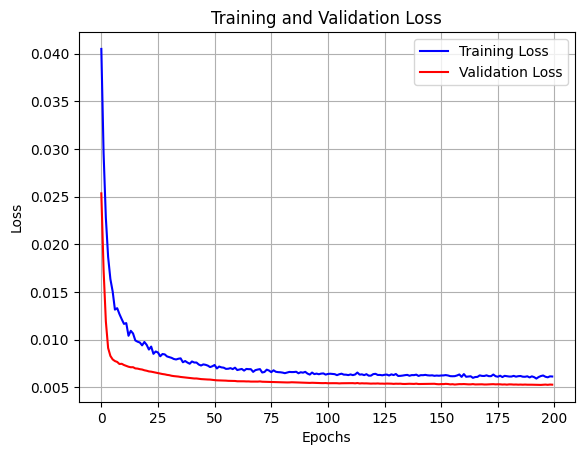


Window Size:  45 , Num of Units:  14
Shape: (775, 45, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0374 - val_loss: 0.0153
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0191 - val_loss: 0.0080
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - val_loss: 0.0058
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0124 - val_loss: 0.0052
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0117 - val_loss: 0.0051
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0106 - val_loss: 0.0049
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0105 - val_loss: 0.0049
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0098 - val_loss: 0.0048
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0096 - val_loss: 0.0047
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0091 - val_loss: 0.0047
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - val_loss: 0.0046
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0

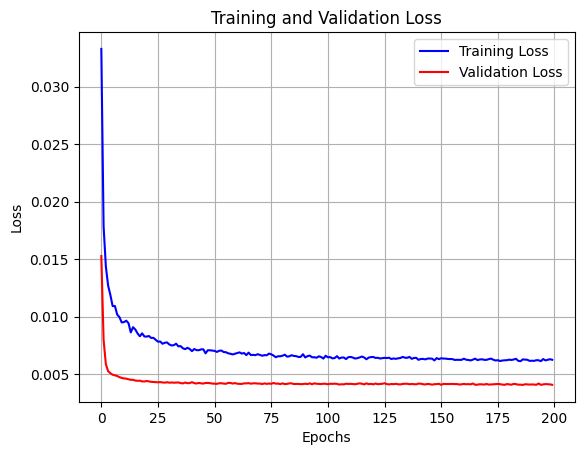


Window Size:  64 , Num of Units:  0

Window Size:  24 , Num of Units:  9
Shape: (793, 24, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0373 - val_loss: 0.0229
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0219 - val_loss: 0.0125
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0146 - val_loss: 0.0080
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - val_loss: 0.0063
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - val_loss: 0.0060
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0107 - val_loss: 0.0058
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0108 - val_loss: 0.0058
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0102 - val_loss: 0.0057
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0102 - val_loss: 0.0057
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - val_loss: 0.0056
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0099 - val_loss: 0.0055
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

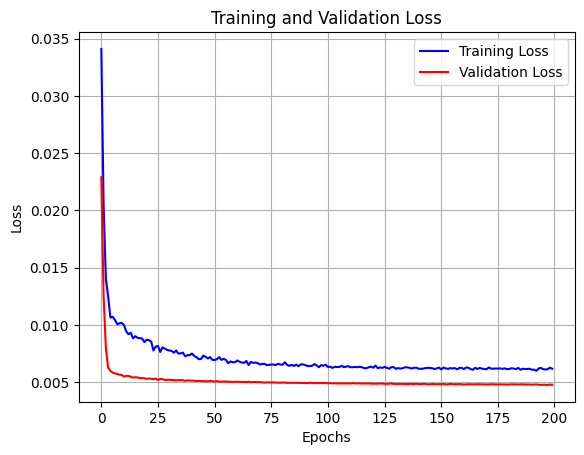


Window Size:  64 , Num of Units:  0

Window Size:  62 , Num of Units:  1
Shape: (760, 62, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0690 - val_loss: 0.0601
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0601 - val_loss: 0.0538
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0523 - val_loss: 0.0486
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0472 - val_loss: 0.0443
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0426 - val_loss: 0.0405
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0386 - val_loss: 0.0372
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0348 - val_loss: 0.0344
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0323 - val_loss: 0.0318
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0293 - val_loss: 0.0295
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0273 - val_loss: 0.0275
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0250 - val_loss: 0.0257
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0

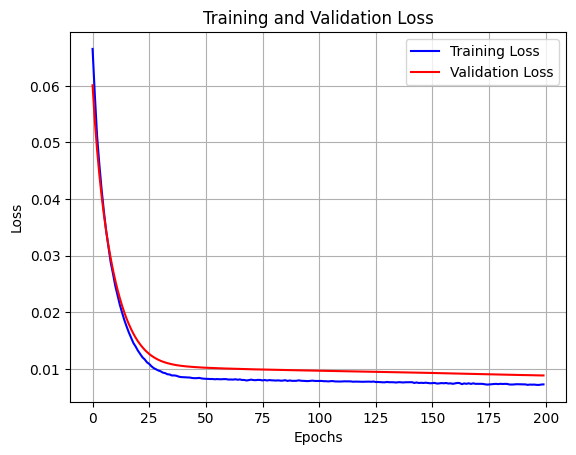


Window Size:  64 , Num of Units:  0

Window Size:  27 , Num of Units:  7
Shape: (790, 27, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0738 - val_loss: 0.0510
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0509 - val_loss: 0.0331
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0354 - val_loss: 0.0202
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0235 - val_loss: 0.0131
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0198 - val_loss: 0.0104
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - val_loss: 0.0097
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - val_loss: 0.0094
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - val_loss: 0.0091
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - val_loss: 0.0089
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - val_loss: 0.0087
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - val_loss: 0.0085
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

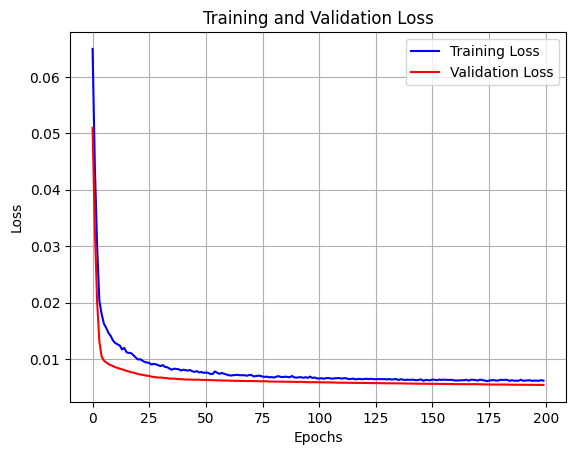


Window Size:  64 , Num of Units:  0

Window Size:  64 , Num of Units:  0

Window Size:  64 , Num of Units:  0

Window Size:  62 , Num of Units:  1
Shape: (760, 62, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0606 - val_loss: 0.0565
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0545 - val_loss: 0.0508
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0486 - val_loss: 0.0459
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0440 - val_loss: 0.0417
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0401 - val_loss: 0.0381
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0363 - val_loss: 0.0349
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0333 - val_loss: 0.0321
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0305 - val_loss: 0.0296
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0281 - val_loss: 0.0274
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0259 - val_loss: 0.0255
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0241 - val_loss: 0.0237
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

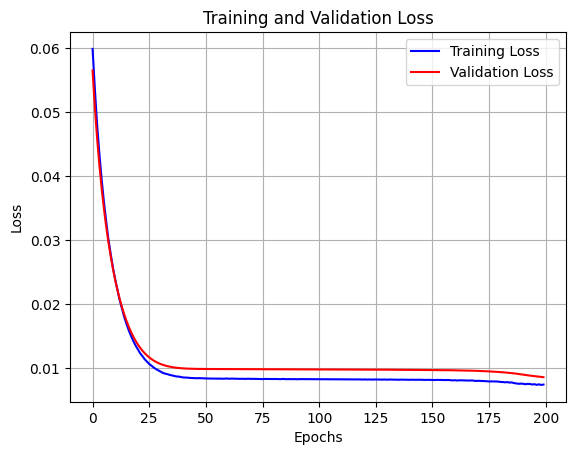


Window Size:  44 , Num of Units:  5
Shape: (776, 44, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0381 - val_loss: 0.0234
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0272 - val_loss: 0.0163
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0218 - val_loss: 0.0113
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0170 - val_loss: 0.0080
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0134 - val_loss: 0.0063
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - val_loss: 0.0055
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - val_loss: 0.0051
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - val_loss: 0.0050
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - val_loss: 0.0050
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0111 - val_loss: 0.0049
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0103 - val_loss: 0.0048
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

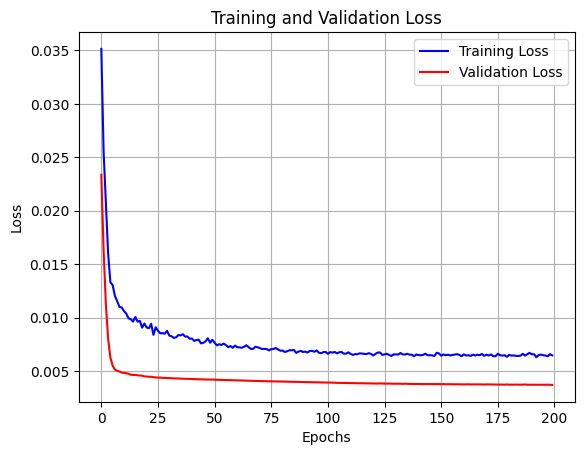


Window Size:  64 , Num of Units:  0

Window Size:  48 , Num of Units:  4
Shape: (772, 48, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1046 - val_loss: 0.0720
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0728 - val_loss: 0.0499
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0495 - val_loss: 0.0335
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0348 - val_loss: 0.0218
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0252 - val_loss: 0.0148
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0194 - val_loss: 0.0120
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0177 - val_loss: 0.0110
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0167 - val_loss: 0.0105
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0151 - val_loss: 0.0102
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0153 - val_loss: 0.0100
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0155 - val_loss: 0.0099
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

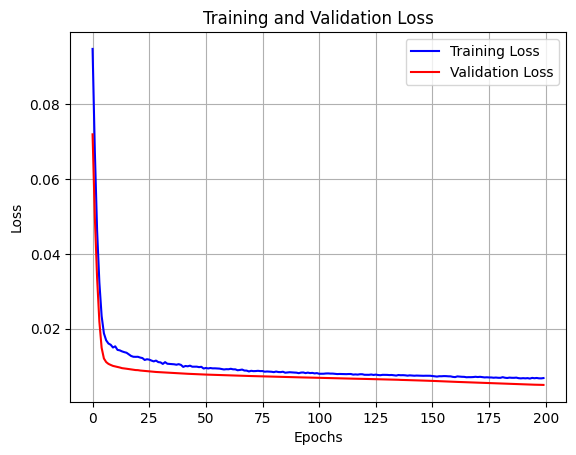

In [ ]:
# GA parameters
population_size = 4
num_generations = 4
gene_length = 10

creator.create('FitnessMax', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n=gene_length)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.6)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

# Process data for Delhi
city = 'Bengaluru'
file_name = filtered_files[city]
print(f'\n{file_name}')
print(f'\nProcessing {city}')
data = load_data(file_name)
data_values = data[['PM2.5', 'PM10', 'NOx', 'CO']].values
train_data = data_values[0:int(len(data_values)*0.75)]
test_data = data_values[int(len(data_values)*0.75):]

population = toolbox.population(n=population_size)
r = algorithms.eaSimple(population, toolbox, cxpb=0.9, mutpb=0.6, ngen=num_generations, verbose=False)

In [ ]:
optimal_individuals_data_ben = tools.selBest(population,k = 1) #select top 1 solution
optimal_window_size_ben = None
optimal_num_units_ben = None

In [ ]:
for bi in optimal_individuals_data_ben:
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:])
    optimal_window_size_ben = window_size_bits.uint
    optimal_num_units_ben = num_units_bits.uint
    print('\n Best Window Size: ', optimal_window_size_ben, ', Best Num of Units: ', optimal_num_units_ben)

#print(optimal_window_size, optimal_num_units)


 Best Window Size:  43 , Best Num of Units:  5


In [ ]:
#hence train the model with the optimal number of lstm units and optimal window size for prediction
X_train,y_train = prepare_dataset(train_data,optimal_window_size_ben)
X_test, y_test_ben = prepare_dataset(test_data,optimal_window_size_ben)

inputs = Input(shape=(optimal_window_size_ben, X_train.shape[2]))
x = LSTM(optimal_num_units_ben, input_shape=(optimal_window_size_ben, X_train.shape[2]))(inputs)
x = Dropout(0.2)(x)
predictions = Dense(y_train.shape[1], activation='linear')(x)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True)
y_pred_ben = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test_ben, y_pred_ben))
print(f'Test RMSE in {city}: ', rmse)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0469
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0324
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0230
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0188
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0161
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0150
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0125
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0114
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115
Epoch 13/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0104
Epoch 14/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109
Epoch 15/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0104
E

In [ ]:
print(city)

Bengaluru


In [ ]:
scaler = scalers[city]
# Inverse transform the predictions and actual values for each component
pollutants = ['PM2.5', 'PM10', 'NOx', 'CO']
metrics = {}
y_pred_original_dict = {}
y_test_original_dict = {}

for i, pollutant in enumerate(pollutants):
    y_pred_original_ben = scaler.inverse_transform(y_pred_ben)[:, i]
    y_test_original_ben = scaler.inverse_transform(y_test_ben)[:, i]

    rmse = np.sqrt(mean_squared_error(y_test_original_ben, y_pred_original_ben))
    mae = mean_absolute_error(y_test_original_ben, y_pred_original_ben)

    metrics[pollutant] = {'RMSE': rmse, 'MAE': mae}
    y_pred_original_dict[pollutant] = y_pred_original_ben
    y_test_original_dict[pollutant] = y_test_original_ben

# Print RMSE and MAE for each pollutant
for pollutant, values in metrics.items():
    print(f'{pollutant} - Test RMSE (original scale): {values["RMSE"]}')
    print(f'{pollutant} - Test MAE (original scale): {values["MAE"]}')

PM2.5 - Test RMSE (original scale): 12.21744467017313
PM2.5 - Test MAE (original scale): 8.273687978255621
PM10 - Test RMSE (original scale): 22.428495595067332
PM10 - Test MAE (original scale): 15.860461004374267
NOx - Test RMSE (original scale): 5.810745814973491
NOx - Test MAE (original scale): 4.523110633189068
CO - Test RMSE (original scale): 0.22016016046719405
CO - Test MAE (original scale): 0.15439094438449572


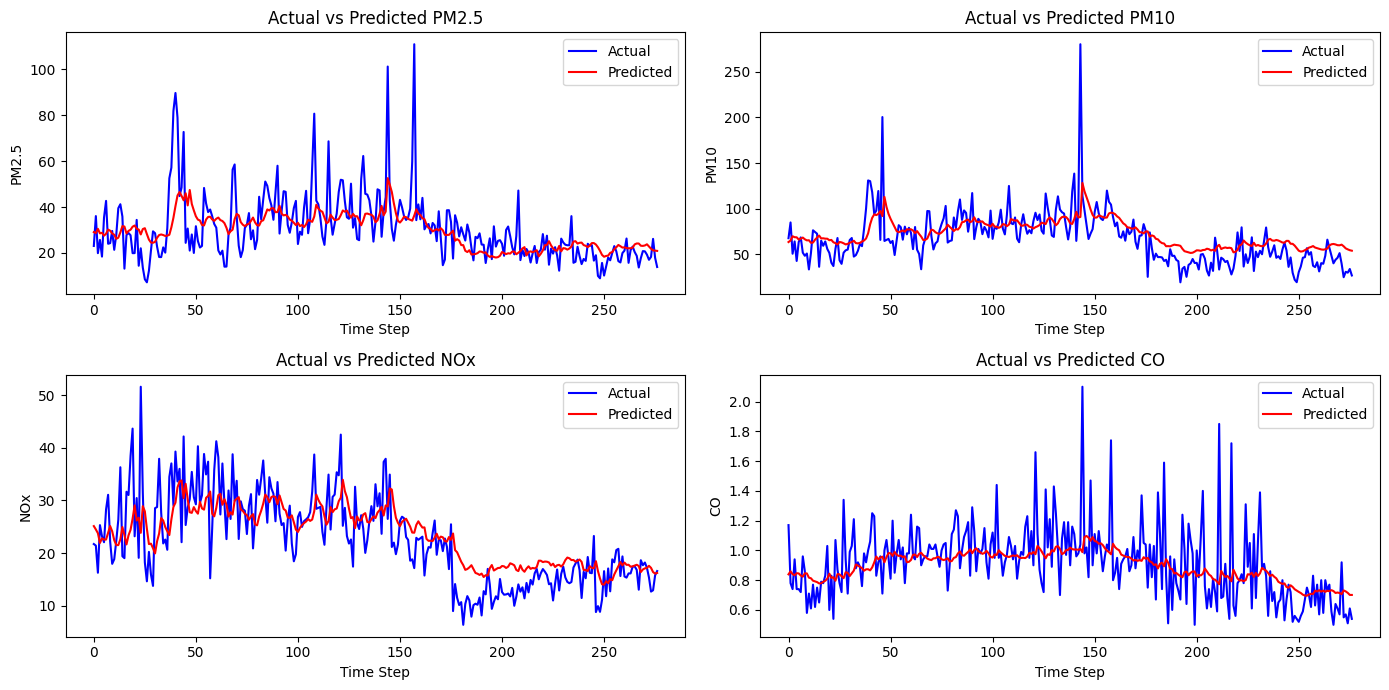

In [ ]:
# Plot the actual vs predicted values for each pollutant
plt.figure(figsize=(14, 7))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test_original_dict[pollutant], label='Actual', color='blue')
    plt.plot(y_pred_original_dict[pollutant], label='Predicted', color='red')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.xlabel('Time Step')
    plt.ylabel(pollutant)
    plt.legend()

plt.tight_layout()
plt.savefig(project_dir+'actual_predicted_pollutants_bengaluru_original.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Processing Hyderabad

Window Size:  49 , Num of Units:  14
Shape: (771, 49, 4)
Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1069 - val_loss: 0.0603
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0569 - val_loss: 0.0285
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0315 - val_loss: 0.0158
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0219 - val_loss: 0.0115
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0208 - val_loss: 0.0105
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0163 - val_loss: 0.0100
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0165 - val_loss: 0.0096
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0159 - val_loss: 0.0094
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0151 - val_loss: 0.0093
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0145 - val_loss: 0.0090
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss

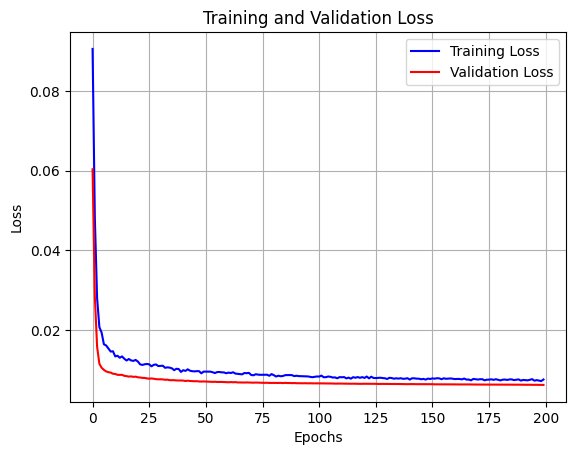


Window Size:  31 , Num of Units:  8
Shape: (787, 31, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1300 - val_loss: 0.1046
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0922 - val_loss: 0.0759
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0678 - val_loss: 0.0545
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0494 - val_loss: 0.0374
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0382 - val_loss: 0.0263
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0307 - val_loss: 0.0206
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0275 - val_loss: 0.0181
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0255 - val_loss: 0.0170
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - val_loss: 0.0162
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0236 - val_loss: 0.0155
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0234 - val_loss: 0.0153
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

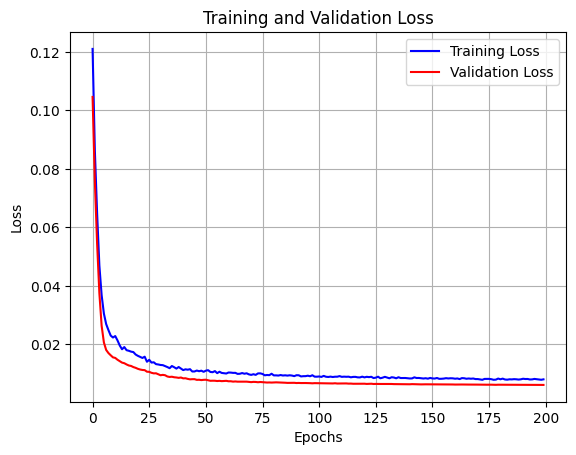


Window Size:  23 , Num of Units:  4
Shape: (793, 23, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.1048 - val_loss: 0.0785
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0805 - val_loss: 0.0617
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0639 - val_loss: 0.0497
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0521 - val_loss: 0.0407
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0431 - val_loss: 0.0337
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0363 - val_loss: 0.0285
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0309 - val_loss: 0.0247
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0297 - val_loss: 0.0220
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0257 - val_loss: 0.0201
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0243 - val_loss: 0.0187
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0235 - val_loss: 0.0177
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.

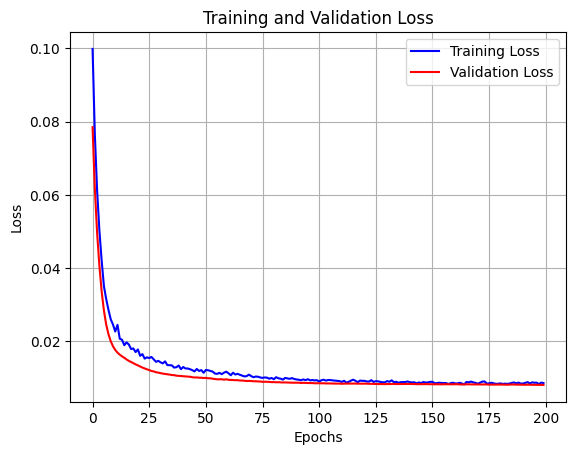


Window Size:  16 , Num of Units:  11
Shape: (799, 16, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0574 - val_loss: 0.0371
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - val_loss: 0.0247
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0294 - val_loss: 0.0178
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0224 - val_loss: 0.0141
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - val_loss: 0.0123
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - val_loss: 0.0114
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - val_loss: 0.0108
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - val_loss: 0.0104
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0145 - val_loss: 0.0100
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0097
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0138 - val_loss: 0.0095
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

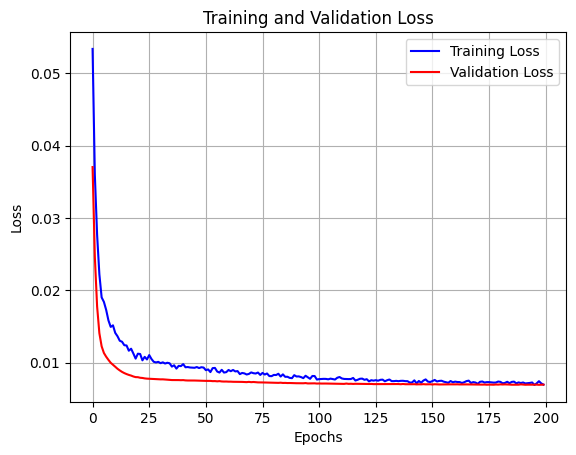


Window Size:  7 , Num of Units:  8
Shape: (807, 7, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1073 - val_loss: 0.0889
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - val_loss: 0.0676
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0613 - val_loss: 0.0523
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - val_loss: 0.0404
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - val_loss: 0.0311
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0305 - val_loss: 0.0241
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 - val_loss: 0.0191
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223 - val_loss: 0.0161
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0202 - val_loss: 0.0144
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - val_loss: 0.0136
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0186 - val_loss: 0.0130
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0172 - val_l

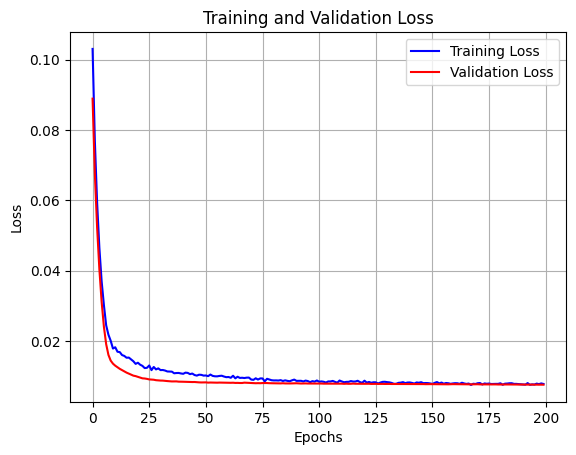


Window Size:  50 , Num of Units:  0

Window Size:  20 , Num of Units:  10
Shape: (796, 20, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1140 - val_loss: 0.0792
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0744 - val_loss: 0.0515
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0507 - val_loss: 0.0345
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0417 - val_loss: 0.0250
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0310 - val_loss: 0.0196
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0306 - val_loss: 0.0168
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0236 - val_loss: 0.0149
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0239 - val_loss: 0.0140
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - val_loss: 0.0133
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0204 - val_loss: 0.0129
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0178 - val_loss: 0.0126
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

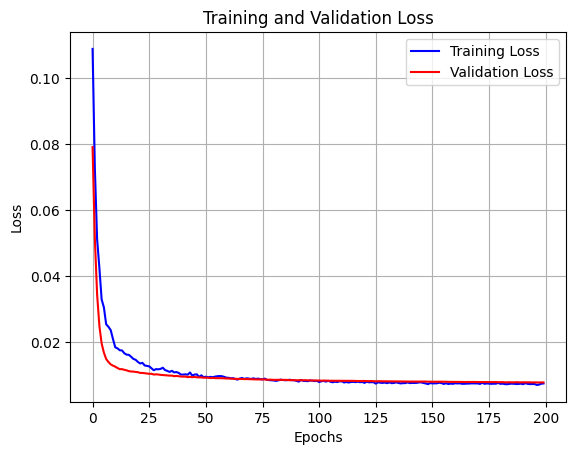


Window Size:  39 , Num of Units:  5
Shape: (780, 39, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0742 - val_loss: 0.0400
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0552 - val_loss: 0.0270
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - val_loss: 0.0200
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0358 - val_loss: 0.0165
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0272 - val_loss: 0.0150
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0278 - val_loss: 0.0141
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0262 - val_loss: 0.0137
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0238 - val_loss: 0.0136
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0252 - val_loss: 0.0131
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - val_loss: 0.0130
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0201 - val_loss: 0.0127
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

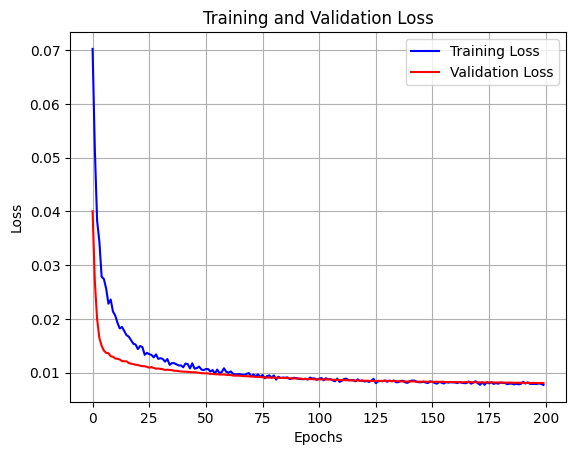


Window Size:  2 , Num of Units:  10
Shape: (811, 2, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0919 - val_loss: 0.0789
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0768 - val_loss: 0.0657
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0644 - val_loss: 0.0540
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - val_loss: 0.0432
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0428 - val_loss: 0.0334
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0345 - val_loss: 0.0253
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - val_loss: 0.0193
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - val_loss: 0.0155
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192 - val_loss: 0.0135
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - val_loss: 0.0126
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0166 - val_loss: 0.0120
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162 - val_

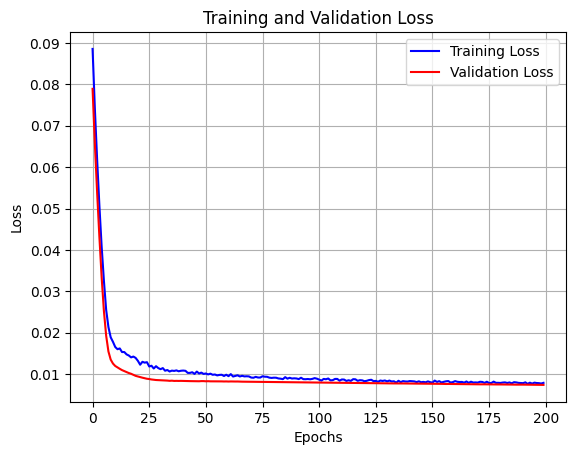


Window Size:  18 , Num of Units:  8
Shape: (798, 18, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0739 - val_loss: 0.0596
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0537 - val_loss: 0.0423
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0397 - val_loss: 0.0316
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0306 - val_loss: 0.0247
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0248 - val_loss: 0.0202
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - val_loss: 0.0174
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0217 - val_loss: 0.0160
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - val_loss: 0.0151
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - val_loss: 0.0146
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - val_loss: 0.0141
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0172 - val_loss: 0.0137
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0

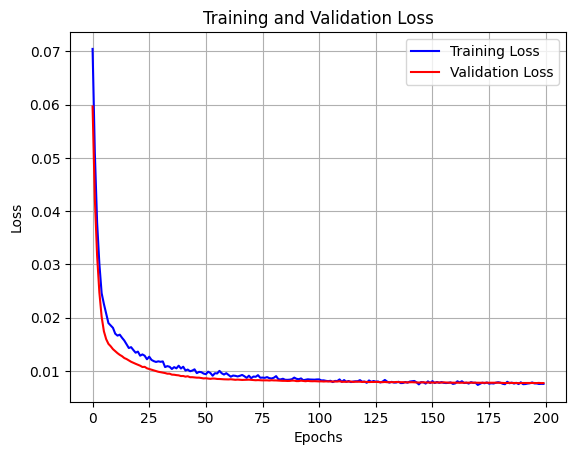


Window Size:  50 , Num of Units:  0

Window Size:  50 , Num of Units:  0

Window Size:  50 , Num of Units:  0

Window Size:  35 , Num of Units:  4
Shape: (783, 35, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3636 - val_loss: 0.3008
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3046 - val_loss: 0.2523
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2529 - val_loss: 0.2135
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2128 - val_loss: 0.1815
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1767 - val_loss: 0.1549
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1456 - val_loss: 0.1330
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1249 - val_loss: 0.1142
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1080 - val_loss: 0.0977
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0893 - val_loss: 0.0840
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0768 - val_loss: 0.0730
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0674 - val_loss: 0.0638
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0

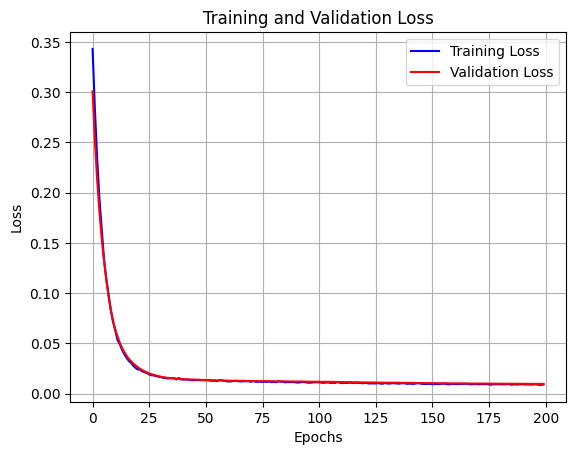


Window Size:  34 , Num of Units:  2
Shape: (784, 34, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.2201 - val_loss: 0.1759
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1572 - val_loss: 0.1325
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1190 - val_loss: 0.1046
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0942 - val_loss: 0.0865
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0778 - val_loss: 0.0742
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0673 - val_loss: 0.0658
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0595 - val_loss: 0.0594
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0535 - val_loss: 0.0543
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0500 - val_loss: 0.0501
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0462 - val_loss: 0.0466
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - val_loss: 0.0436
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

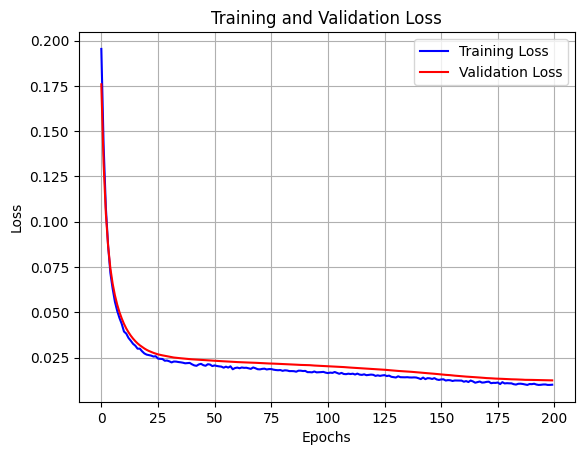


Window Size:  50 , Num of Units:  0

Window Size:  17 , Num of Units:  3
Shape: (799, 17, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2973 - val_loss: 0.2492
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2488 - val_loss: 0.2032
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2030 - val_loss: 0.1683
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1698 - val_loss: 0.1413
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1447 - val_loss: 0.1203
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1219 - val_loss: 0.1038
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1084 - val_loss: 0.0900
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0914 - val_loss: 0.0787
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0805 - val_loss: 0.0693
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0698 - val_loss: 0.0615
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0630 - val_loss: 0.0550
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

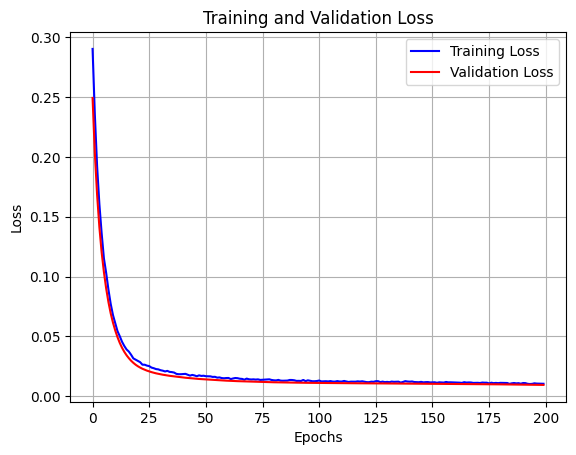


Window Size:  11 , Num of Units:  4
Shape: (804, 11, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0659 - val_loss: 0.0494
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0544 - val_loss: 0.0404
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0455 - val_loss: 0.0342
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0379 - val_loss: 0.0296
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0355 - val_loss: 0.0264
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0325 - val_loss: 0.0239
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0300 - val_loss: 0.0219
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0283 - val_loss: 0.0203
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0260 - val_loss: 0.0190
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0252 - val_loss: 0.0181
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0241 - val_loss: 0.0171
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.

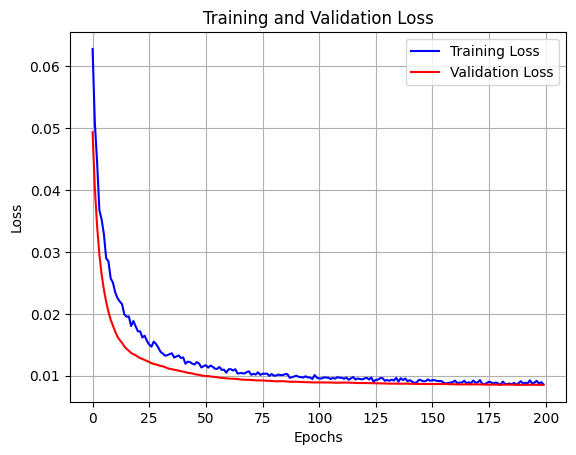


Window Size:  2 , Num of Units:  3
Shape: (811, 2, 4)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1041 - val_loss: 0.0911
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0909 - val_loss: 0.0786
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0786 - val_loss: 0.0678
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - val_loss: 0.0585
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0590 - val_loss: 0.0505
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - val_loss: 0.0437
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0474 - val_loss: 0.0379
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - val_loss: 0.0330
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - val_loss: 0.0291
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - val_loss: 0.0261
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321 - val_loss: 0.0237
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_l

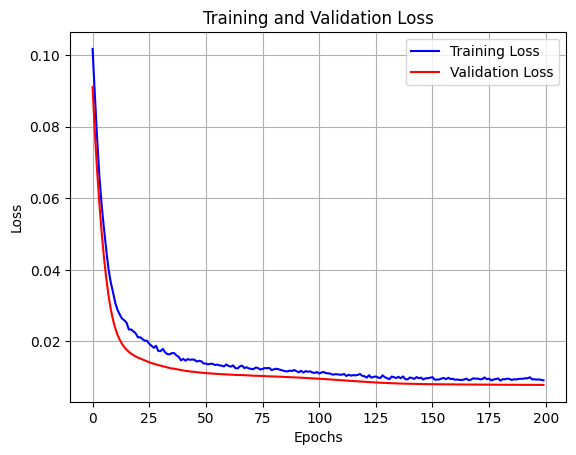


Window Size:  50 , Num of Units:  0


In [ ]:
# GA parameters
population_size = 4
num_generations = 4
gene_length = 10

creator.create('FitnessMax', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n=gene_length)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.6)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

# Process data for Delhi
city = 'Hyderabad'
file_name = filtered_files[city]
print(f'\nProcessing {city}')
data = load_data(file_name)
data_values = data[['PM2.5', 'PM10', 'NOx', 'CO']].values
train_data = data_values[0:int(len(data_values)*0.75)]
test_data = data_values[int(len(data_values)*0.75):]

population = toolbox.population(n=population_size)
r = algorithms.eaSimple(population, toolbox, cxpb=0.9, mutpb=0.6, ngen=num_generations, verbose=False)

In [ ]:
optimal_individuals_data_hyd = tools.selBest(population,k = 1) #select top 1 solution
optimal_window_size_hyd = None
optimal_num_units_hyd = None

In [ ]:
for bi in optimal_individuals_data_hyd:
    window_size_bits = BitArray(bi[0:6])
    num_units_bits = BitArray(bi[6:])
    optimal_window_size_hyd = window_size_bits.uint
    optimal_num_units_hyd = num_units_bits.uint

In [ ]:
print('\n Best Window Size for Hyderabad: ', optimal_window_size_hyd, ', Best Num of Units: ', optimal_num_units_hyd)


 Best Window Size for Hyderabad:  28 , Best Num of Units:  10


In [ ]:
optimal_window_size_hyd = 28
optimal_num_units_hyd = 10

#hence train the model with the optimal number of lstm units and optimal window size for prediction
X_train,y_train = prepare_dataset(train_data,optimal_window_size_hyd)
X_test, y_test_hyd = prepare_dataset(test_data,optimal_window_size_hyd)

inputs = Input(shape=(optimal_window_size_hyd, X_train.shape[2]))
x = LSTM(optimal_num_units_hyd, input_shape=(optimal_window_size_hyd, X_train.shape[2]))(inputs)
x = Dropout(0.2)(x)
predictions = Dense(y_train.shape[1], activation='linear')(x)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True)
y_pred_hyd = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test_hyd, y_pred_hyd))
print(f'Test RMSE in {city}: ', rmse)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1124
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0708
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0262
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0221
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0194
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0173
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0157
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0153
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0143
Epoch 13/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0135
Epoch 14/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0128
Epoch 15/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - los

In [ ]:
scaler = scalers[city]
# Inverse transform the predictions and actual values for each component
pollutants = ['PM2.5', 'PM10', 'NOx', 'CO']
metrics = {}
y_pred_original_dict = {}
y_test_original_dict = {}

for i, pollutant in enumerate(pollutants):
    y_pred_original_hyd = scaler.inverse_transform(y_pred_hyd)[:, i]
    y_test_original_hyd = scaler.inverse_transform(y_test_hyd)[:, i]

    rmse = np.sqrt(mean_squared_error(y_test_original_hyd, y_pred_original_hyd))
    mae = mean_absolute_error(y_test_original_hyd, y_pred_original_hyd)

    metrics[pollutant] = {'RMSE': rmse, 'MAE': mae}
    y_pred_original_dict[pollutant] = y_pred_original_hyd
    y_test_original_dict[pollutant] = y_test_original_hyd

# Print RMSE and MAE for each pollutant
for pollutant, values in metrics.items():
    print(f'{pollutant} - Test RMSE (original scale): {values["RMSE"]}')
    print(f'{pollutant} - Test MAE (original scale): {values["MAE"]}')

PM2.5 - Test RMSE (original scale): 12.095735304243457
PM2.5 - Test MAE (original scale): 9.71422392884346
PM10 - Test RMSE (original scale): 22.298782033175776
PM10 - Test MAE (original scale): 17.654527645894927
NOx - Test RMSE (original scale): 4.938104163943267
NOx - Test MAE (original scale): 2.892569410898914
CO - Test RMSE (original scale): 0.12349503974933412
CO - Test MAE (original scale): 0.08806527150820381


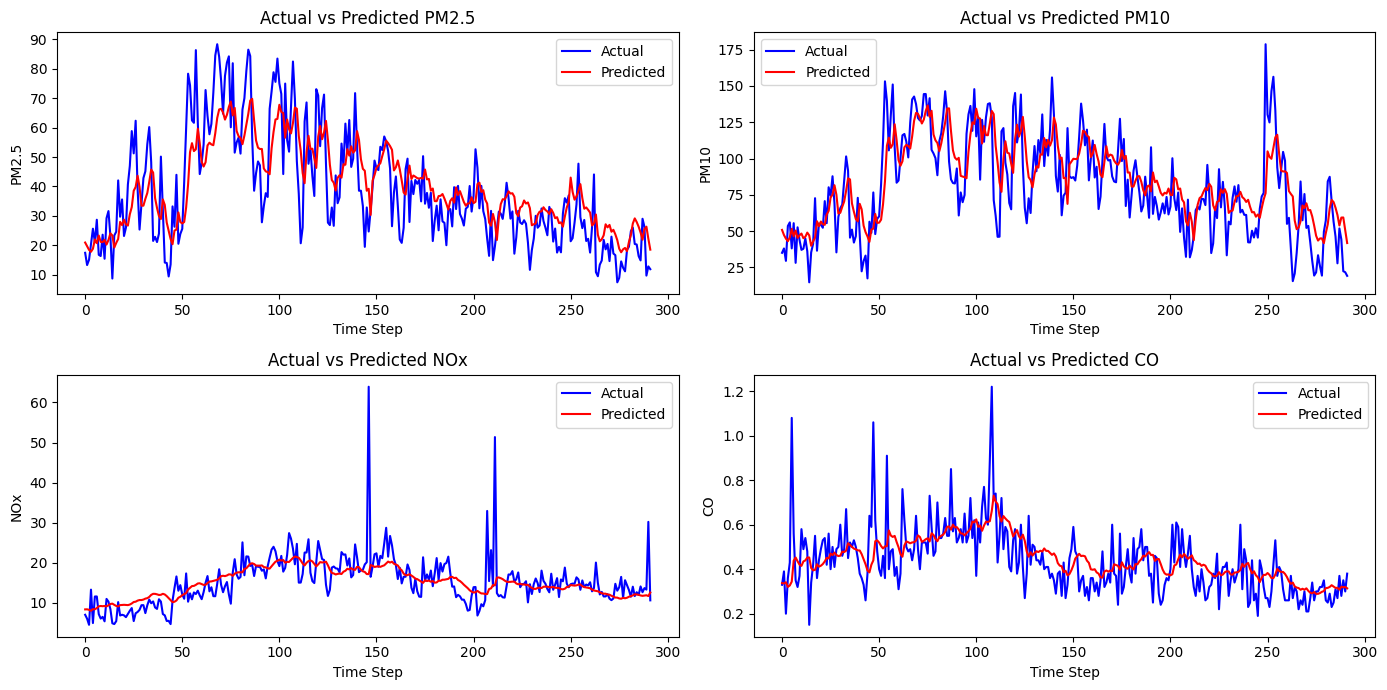

In [ ]:
# Plot the actual vs predicted values for each pollutant
plt.figure(figsize=(14, 7))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test_original_dict[pollutant], label='Actual', color='blue')
    plt.plot(y_pred_original_dict[pollutant], label='Predicted', color='red')
    plt.title(f'Actual vs Predicted {pollutant}')
    plt.xlabel('Time Step')
    plt.ylabel(pollutant)
    plt.legend()

plt.tight_layout()
plt.savefig(project_dir+'actual_predicted_pollutants_hyd_original.png')
plt.show()